In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import auxiliary_project_functions as aux
import qtLibrary.libquanttree as qt
import pathlib


<p> <strong> We want to: </strong><p>
<p> 1) Store the settings in the file, or a file with a pointer from our filr (binsnumber, nu, alpaha, maxN, stat_used)<p>
<p> 2) Generate multiple combinations of bins and N.<p>
<p> 3) Associate to each combination a threshold by means of the normal MC or the auxilary MC.<p>
<p>4) Save the result in a file<p>


In [23]:
#DESCRIPTION FILE

statistic = qt.tv_statistic
alpha = [0.01]
nu = 64
bins_number = 16
B = 4000
max_N = 400 * bins_number

file = 'Thresholds_TV_1.csv'

#Help dictionary will be stored in a file pointing to our file
help_dictionary = {'Stat': statistic, 'nu': nu, 'bins_number': bins_number, 'file': file, 'B': B, 'alpha': alpha, 'max_N': max_N}
help_dictionary

{'Stat': <function qtLibrary.libquanttree.tv_statistic(histogram, data)>,
 'nu': 64,
 'bins_number': 16,
 'file': 'Thresholds_TV_1.csv',
 'B': 4000,
 'alpha': [0.01],
 'max_N': 6400}

In [3]:

"""data_number = max_N * bins_number
data = np.zeros([data_number, bins_number + 2])
frame = pd.DataFrame(data)
frame = frame.rename(columns = {17: 'Thresholds', 16: 'N'})
for index in range(data_number):
    bins = aux.create_bins_combination(bins_number)
    frame.iloc[index, :bins_number] = np.sort(bins)
    frame.loc[index, 'N'] = np.random.randint(low = bins_number, high = max_N)
frame.head(10)
frame.describe()
"""

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,N,Thresholds
count,1.024000e+05,102400.000000,102400.000000,102400.000000,102400.000000,102400.000000,102400.000000,102400.000000,102400.000000,102400.000000,102400.000000,102400.000000,102400.000000,102400.000000,102400.000000,102400.000000,102400.000000,102400.0
mean,5.681713e-03,0.011467,0.017357,0.023331,0.029542,0.035970,0.042689,0.049764,0.057272,0.065467,0.074426,0.084570,0.096401,0.110905,0.130613,0.164545,3202.039385,0.0
std,4.996018e-03,0.006695,0.007729,0.008373,0.008779,0.009033,0.009183,0.009270,0.009374,0.009608,0.010039,0.010873,0.012436,0.015229,0.020467,0.033523,1840.594341,0.0
min,3.422932e-08,0.000042,0.000195,0.000607,0.001747,0.004271,0.008818,0.012594,0.017836,0.022178,0.026467,0.041999,0.047300,0.056243,0.073782,0.084011,16.000000,0.0
25%,1.842881e-03,0.006303,0.011533,0.017212,0.023322,0.029716,0.036501,0.043597,0.051099,0.059129,0.067753,0.077275,0.087817,0.100123,0.116045,0.140582,1603.000000,0.0
50%,4.283848e-03,0.010421,0.016671,0.022970,0.029431,0.036057,0.042882,0.050042,0.057527,0.065643,0.074407,0.084223,0.095572,0.109504,0.128259,0.159373,3205.000000,0.0
75%,8.150779e-03,0.015585,0.022439,0.029082,0.035617,0.042252,0.049100,0.056188,0.063723,0.071989,0.081078,0.091495,0.104134,0.120160,0.142610,0.183024,4801.000000,0.0
max,4.317981e-02,0.045086,0.052666,0.060151,0.062152,0.068877,0.078620,0.086260,0.094101,0.104695,0.122851,0.138935,0.162648,0.204772,0.263020,0.427638,6399.000000,0.0


In [20]:
for index in range(3, 100):
    tree = qt.QuantTree(frame.iloc[index, :16])
    tree.ndata = int(frame.loc[index, 'N'])
    tree.ndata
    frame.loc[index, 'Thresholds'] = qt.ChangeDetectionTest(tree, nu, statistic).estimate_quanttree_threshold(alpha, B)
    current_value = index
frame.head()


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,N,Thresholds
0,0.004321,0.005508,0.012489,0.019090,0.020203,0.022140,0.028097,0.031823,0.039871,0.042635,0.099012,0.099212,0.102680,0.115185,0.116746,0.240988,4266.0,17.014224
1,0.001975,0.003357,0.005379,0.011644,0.028759,0.042587,0.056388,0.056457,0.058369,0.073483,0.074617,0.081417,0.094059,0.114888,0.130587,0.166034,5953.0,17.125175
2,0.001319,0.009813,0.010359,0.018691,0.024490,0.026523,0.035959,0.057657,0.058693,0.063488,0.068233,0.084748,0.103042,0.109165,0.158681,0.169138,4731.0,17.246649
3,0.010567,0.013043,0.016734,0.019783,0.025099,0.031454,0.031833,0.034551,0.044387,0.080846,0.083355,0.091127,0.092571,0.095736,0.111455,0.217460,3821.0,17.235612
4,0.002466,0.003899,0.012755,0.014165,0.025680,0.031635,0.032224,0.032392,0.052057,0.068740,0.069373,0.090289,0.110574,0.132423,0.147831,0.173499,1011.0,17.248572


In [21]:
frame.to_csv(file)

In [22]:
file

'Thresholds_TV_1'

In [26]:
frame2 = pd.DataFrame(help_dictionary)
frame2.to_csv('Legend_Dataset')

,Stat,nu,bins_number,file,B,alpha,max_N
0,<function tv_statistic at 0x0000011C281DB558>,64,16,Thresholds_TV_1,4000,0.01,6400


In [27]:
frame2.to_csv('Legend_Dataset')

In [29]:
pathlib.Path().cwd()

WindowsPath('C:/Users/dalun/PycharmProjects/Thesiss')

<p><strong>File stored with the first 100 values. Next time retrieve dataset, add data (and study meanwhile) <p>
    

In [ ]:
#Retrieve dats
frame = pd.read_csv('Thresholds_TV_1.csv')
frame.drop(frame.columns[0], axis = 1, inplace = True)
tree = qt.QuantTree(frame.iloc[100, :16])
tree.ndata = int(frame.loc[100, 'N'])
tree.ndata
frame.loc[100, 'Thresholds'] = qt.ChangeDetectionTest(tree, nu, statistic).estimate_quanttree_threshold(alpha, B)
for index in range(103, 400):
    tree = qt.QuantTree(frame.iloc[index, :16])
    tree.ndata = int(frame.loc[index, 'N'])
    tree.ndata
    frame.loc[index, 'Thresholds'] = qt.ChangeDetectionTest(tree, nu, statistic).estimate_quanttree_threshold(alpha, B)
    current_value = index

frame.to_csv(file)

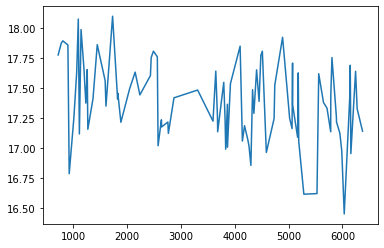

In [31]:
#Thresholds as function of numbers

numbers_thresholds = data.iloc[:, -2:]
numbers_thresholds = numbers_thresholds.sort_values('N')
numbers_thresholds

plt.plot(numbers_thresholds.iloc[10:,0], numbers_thresholds.iloc[10:,1])

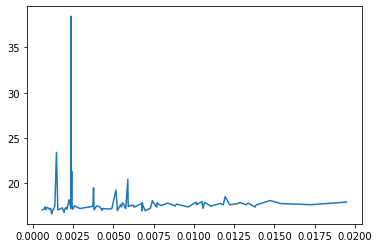

In [47]:
#Thresholds as function of mins

mins_thresholds = data.iloc[:, [0, -1]]
mins_thresholds.head()

mins_thresholds = mins_thresholds.sort_values('0')
mins_thresholds

plt.plot(mins_thresholds.iloc[10:,0], mins_thresholds.iloc[10:,1])
